## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"].unique())
print("Total number of mice: " + str(total_mice))

Total number of mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data_df[combined_data_df.duplicated()]
dup_mouse = duplicate['Mouse ID']
dupmouse = dup_mouse.iloc[0]
dupmouse

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup = combined_data_df.loc[combined_data_df['Mouse ID'] == dupmouse]
dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#pd.set_option("display.max_rows", None)
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df["Mouse ID"].str.contains(dupmouse)==False]
clean_data_df[clean_data_df['Drug Regimen'] == "Infubinol"][['Tumor Volume (mm3)', 'Timepoint']]                                                   

,Tumor Volume (mm3),Timepoint
213,45.000000,0
214,36.321346,5
215,45.000000,0
216,48.753112,5
217,49.992954,10
...,...,...
1655,53.078894,25
1656,54.363797,30
1657,56.523327,35
1658,58.315593,40


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_total = len(clean_data_df['Mouse ID'].unique())
new_mice_total

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regi_mean = clean_data_df.groupby('Drug Regimen').mean()
regimean = regi_mean['Tumor Volume (mm3)']
regimean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
regi_median = clean_data_df.groupby('Drug Regimen').median()
regimedian = regi_median['Tumor Volume (mm3)']
regimedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
regi_var = clean_data_df.groupby('Drug Regimen').var()
regivar = regi_var['Tumor Volume (mm3)']
regivar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
regi_sd = clean_data_df.groupby('Drug Regimen').std()
regisd = regi_sd['Tumor Volume (mm3)']
regisd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
regi_sem = clean_data_df.groupby('Drug Regimen').sem()
regisem = regi_sem['Tumor Volume (mm3)']
regisem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Assemble the resulting series into a single summary dataframe.
describe_summary_df = pd.DataFrame({
    'Tumor Volume Mean': regimean,
    'Tumor Volume Median': regimedian,
    'Tumor Volume Variance': regivar,
    'Tumor Volume Standard Deviation': regisd,
    'Tumor Volume SEM': regisem
})
describe_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_data_df.groupby('Drug Regimen').agg(["mean","median","var","std","sem"])
agg_df['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_regi = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug = mice_per_regi[['Drug Regimen', 'Mouse ID']]
mice_perdrug = mice_perdrug.set_index('Drug Regimen')
sorted_mice_perdrug = mice_perdrug.sort_values(by='Mouse ID', ascending=False)
sorted_mice_perdrug

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


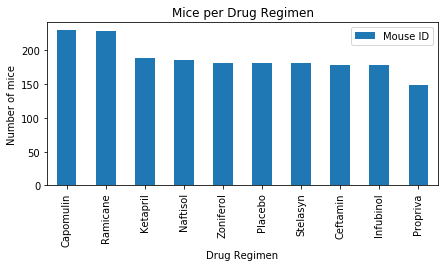

<Figure size 432x288 with 0 Axes>

In [16]:
# Use DataFrame.plot() in order to create a bar chart of the data
sorted_mice_perdrug.plot(kind="bar", figsize=(7,3))

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.ylabel("Number of mice")

plt.show()
plt.tight_layout()

In [17]:
mice_per_regi2 = clean_data_df.groupby('Drug Regimen').count().reset_index()
mice_perdrug2 = mice_per_regi[['Drug Regimen', 'Mouse ID']]
sorted_mice_perdrug2 = mice_perdrug2.sort_values(by='Mouse ID', ascending=False)
sorted_mice_perdrug2

,Drug Regimen,Mouse ID
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(sorted_mice_perdrug2))
tick_locations = [value for value in x_axis]
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

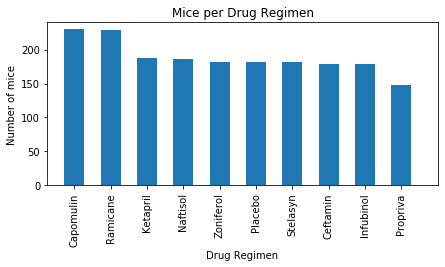

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a list indicating where to write x labels
plt.figure(figsize=(7,3))
plt.bar(x_axis, sorted_mice_perdrug2["Mouse ID"], alpha=1, width=.55, align="center")
plt.xticks(tick_locations, sorted_mice_perdrug2["Drug Regimen"], rotation="vertical")

# Set a title for the chart
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(sorted_mice_perdrug2["Mouse ID"])+10)

plt.show()
plt.tight_layout()

In [20]:
#Modify data to only list one entry per mouse
all_mice = clean_data_df.drop_duplicates(subset='Mouse ID', keep='first')
male_female = all_mice['Sex'].value_counts()
male_female

Male      125
Female    123
Name: Sex, dtype: int64

In [21]:
male_female_df = pd.DataFrame({
    "Mice per Gender": male_female
})
male_female_df

,Mice per Gender
Male,125
Female,123


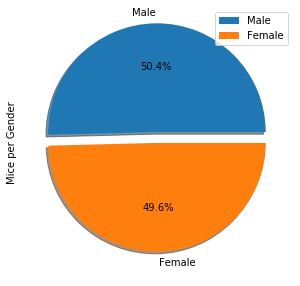

In [22]:
explode = (0.1, 0)
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Modify data to only list one entry per mouse
male_female_df.plot.pie(y='Mice per Gender', startangle=360, figsize=(5, 5), shadow=True, explode=explode, autopct="%1.1f%%", )

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [125, 123]

# Tells matplotlib to seperate the "Male mice" from "Female mice" section from the others
explode = (0.1, 0)

(-1.104514444557683, 1.100214973550366, -1.10849228033437, 1.2068306581091843)

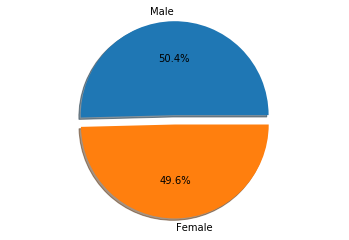

In [24]:
plt.pie(sizes, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=360)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin | 
tum_siz = clean_data_df.groupby('Mouse ID').max()
four_regi = tum_siz.loc[(tum_siz["Drug Regimen"] == "Capomulin") | (
    tum_siz["Drug Regimen"] == "Ramicane") | (tum_siz["Drug Regimen"] == "Infubinol") | (tum_siz["Drug Regimen"] == "Ceftamin"), :]
four_regi

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,45.466677,1,Ramicane,Male,3,22
a444,45,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,45.000000,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


In [26]:
#Extract Drug Regimen, Timepoint, and Tumor Volume (mm3) columns
last_size = four_regi[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

#Sort Columns to match Drug Regimens in the order they were given
last_size['Drug Regimen'] = pd.Categorical(last_size['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
sorted_last_size = last_size.sort_values("Drug Regimen")
sorted_last_size

/Users/alfonsocamero/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
l897,Capomulin,45,46.154737
g288,Capomulin,45,46.304003
g316,Capomulin,45,46.809225
i557,Capomulin,45,47.685963
i738,Capomulin,45,45.595685
...,...,...,...
l733,Ceftamin,45,64.299830
o287,Ceftamin,45,59.741901
q483,Ceftamin,40,64.192341


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

In [28]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

#Append last tumor size for each mouse across four regimens of interest
grouped = clean_data_df.groupby('Mouse ID').max().reset_index()
regi_plot = grouped.loc[(grouped["Drug Regimen"] == "Capomulin") | (
    grouped["Drug Regimen"] == "Ramicane") | (grouped["Drug Regimen"] == "Infubinol") | (grouped["Drug Regimen"] == "Ceftamin"), :]
regi_plot

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,45.466677,1,Ramicane,Male,3,22
7,a444,45,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,45.000000,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,45.000000,0,Ramicane,Male,11,16


In [29]:
#Sort Drug Regimens column by drug
regi_plot['Drug Regimen'] = pd.Categorical(regi_plot['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
sorted_regi_plot = regi_plot.sort_values("Drug Regimen")
sorted_regi_plot.tail(60)

/Users/alfonsocamero/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
91,j913,45,45.252534,1,Ramicane,Female,4,17
52,e662,45,46.409084,2,Ramicane,Male,8,24
33,c458,30,45.722279,2,Ramicane,Female,23,20
70,g791,45,45.851531,1,Ramicane,Male,11,16
37,c758,45,46.940945,1,Ramicane,Male,9,17
76,i177,45,45.000000,3,Ramicane,Male,10,18
157,q597,45,45.766111,2,Ramicane,Male,20,25
190,u196,45,47.622816,3,Ramicane,Male,18,25
217,w678,5,45.000000,0,Ramicane,Female,5,24
77,i334,45,45.000000,2,Ramicane,Female,8,20


In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Computing IQR

In [41]:
second = clean_data_df[["Mouse ID", "Timepoint"]].groupby("Mouse ID").max()
second = pd.DataFrame(second)
final_tp = pd.merge(clean_data_df, second, how="inner", on=["Mouse ID","Timepoint"])
final_tp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [49]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fin_tumvol = []

for drug in drugs:
    
    #final_tp = clean_data_df[clean_data_df['Timepoint'] == clean_data_df['Timepoint'].max()]
    
    #final_tumor_vol = sorted_last_size.loc[sorted_last_size["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    #tumor_vol_list.append(final_tumor_vol)

    tp_perdrug = final_tp[final_tp['Drug Regimen'] == drug]

    drug_tumvol = tp_perdrug['Tumor Volume (mm3)']
    
    fin_tumvol.append(drug_tumvol.values.flatten())
   
    quartiles = drug_tumvol.quantile([.25,.5,.75])
    Q1 = drug_tumvol.quantile(0.25)
    Q3 = drug_tumvol.quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - (1.5*IQR)
    UB = Q3 + (1.5*IQR)
    #print(LB, UB)
    
    outliers = drug_tumvol.loc[(drug_tumvol < LB) | (drug_tumvol > UB)]
    print(f"{drug}'s potential outliers: {outliers}")

fin_tumvol

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[array([38.98287774, 38.75326548, 32.37735684, 23.34359787, 38.93963263,
        28.48403281, 41.48300765, 40.72857787, 46.53920617, 31.02392294,
        38.1251644 , 40.65812366, 36.04104736, 37.31184577, 41.58152074,
        31.8962384 , 40.1592203 , 37.07402422, 38.84687569, 39.95234669,
        34.45529799, 47.68596303, 33.32909778, 30.48598484, 28.43096411]),
 array([38.34200823, 36.56165229, 31.56046955, 38.4076183 , 43.0475426 ,
        37.31123552, 36.13485243, 44.18345092, 22.05012627, 33.39765251,
        37.22565033, 32.97852192, 33.56240217, 29.12847181, 38.81036633,
        40.66771292, 30.56462509, 43.16637266, 31.09533505, 30.27623175,
        40.65900627, 30.63869575, 43.41938077, 45.22086888, 36.37451039]),
 array([36.3213458 , 72.2267309 , 46.25011212, 57.03186187, 67.68556862,
        66.19691151, 62.11727887, 55.62942846, 62.75445141, 65.52574285,
        67.28962147, 54.65654872, 54.04860769, 60.96971133, 67.97341878,
        66.08306589, 45.69933088, 47.01036401, 

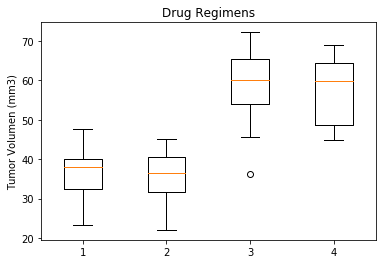

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens')
ax1.set_ylabel('Tumor Volumen (mm3)')
ax1.boxplot(fin_tumvol)
plt.show()

## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
